In [3]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn import model_selection
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [4]:
digits = datasets.load_digits()

In [5]:
digits.images.shape

(1797, 8, 8)

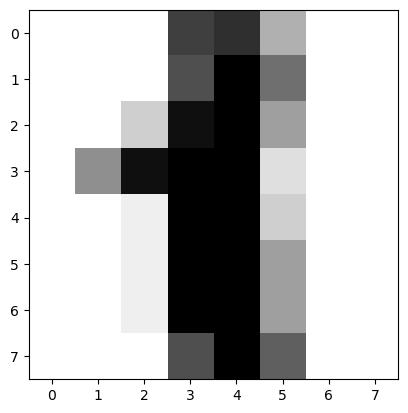

In [6]:
plt.imshow(digits.images[1],cmap=plt.cm.gray_r)

In [7]:
print(digits.target[1])

1


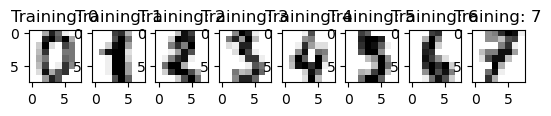

In [8]:
fig, axes = plt.subplots(1,8)
images_and_labels = list(zip(digits.images, digits.target))
for ax,i in zip(axes,range(8)):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % digits.target[i])
plt.show()

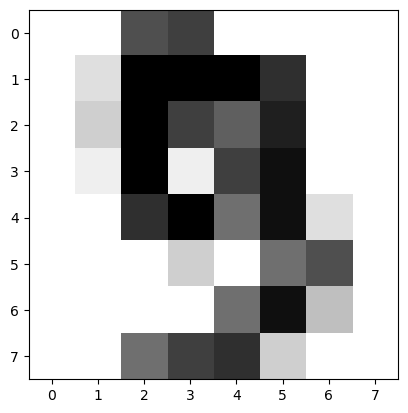

In [9]:
for i in range(10):
    plt.imshow(digits.images[i],cmap=plt.cm.gray_r)
    #print('Training: %i' % digits.target[i])

In [10]:
digits.data.shape

(1797, 64)

In [11]:
test_vec = digits.images[0].reshape(64)

In [12]:
test_vec

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
n_samples = len(digits.images)

In [14]:
data = digits.images.reshape((n_samples,-1))

In [15]:
data.shape

(1797, 64)

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [17]:
X_train

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  2., ..., 14.,  0.,  0.],
       [ 0.,  1., 12., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  3.,  0.,  0.]])

In [18]:
from sklearn.svm import SVC

In [19]:
#classifier = Perceptron(tol=1e-3, random_state=0)
#classifier = MLPClassifier(alpha=0.003, max_iter=500, verbose=True, early_stopping=True)
classifier = SVC(kernel='linear')

In [20]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
pred = classifier.predict(X_test)

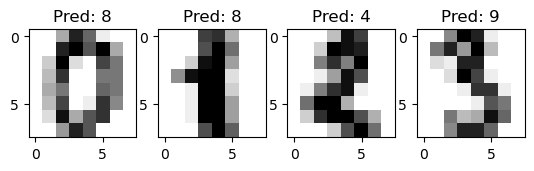

In [22]:
fig, axes = plt.subplots(1,4)
images_and_labels = list(zip(digits.images, digits.target))
for ax,i in zip(axes,range(4)):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Pred: %i' % pred[i])
plt.show()

In [23]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, pred)))

Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.94      0.90      0.92        91
           2       1.00      0.99      0.99        86
           3       0.97      0.86      0.91        91
           4       0.99      0.95      0.97        92
           5       0.90      0.97      0.93        91
           6       0.98      0.99      0.98        91
           7       0.97      0.96      0.96        89
           8       0.88      0.92      0.90        88
           9       0.87      0.93      0.90        92

    accuracy                           0.94       899
   macro avg       0.95      0.94      0.94       899
weighted avg       0.95      0.94      0.94       899




In [24]:
from confusion import show_confusion

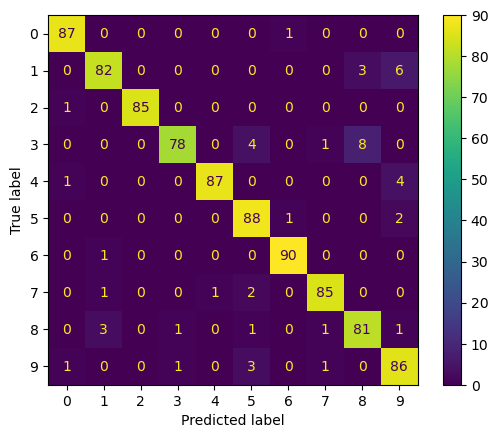

In [25]:
show_confusion(y_test,pred)